In [1]:
# -*- coding: utf-8 -*-
# @author: tongzi
# @description: Data Wrangling: Join, Combine, and Reshape
# @created date: 2019/07/05
# @last modification: 2019/07/10

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%matplotlib notebook

$\lim\limits_{x \to 0} \frac{(1+\cos x) \frac{1}{2}x^2}{3x^2}$
$=\lim\limits_{x \to 0} \frac{2*\frac{1}{2}x^2}{3x^2}=\frac{1}{3}$

$\lim\limits_{x \to 0} \frac{(1+\cos x) \frac{1}{2}x^2}{3x^2}$
$=\lim\limits_{x \to 0} \frac{2*\frac{1}{2}x^2}{3x^2}=\frac{1}{3}$

In many applications, data may be spread across a number of files or databases or be arranged in a form that is not easy to analyze. This chapter is focused on tools to help combine, join and rearrange data.

###  8.1 Hierarchical Indexing

Hierarhical indexing is an important feature of pandas that enable you to have multiple (two or more) index levels on an axis. Somewhat abstractly, it provides a way to work with higher dimensional data in a lower dimensionla form. 

In [3]:
data = pd.Series(np.random.randn(9), index=[
    ['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
    [1, 2, 3, 1, 3, 1, 2, 2, 3]
])

In [4]:
data

a  1    1.487802
   2    1.773813
   3   -1.074098
b  1   -1.043739
   3   -1.325442
c  1    1.177167
   2    1.807624
d  2    0.374835
   3    0.712109
dtype: float64

What we're seeing is a prettified view of a Series with a MultiIndex as its index. The 'gaps' in the index display mean "use the label directly above":

In [5]:
data.index

MultiIndex(levels=[['a', 'b', 'c', 'd'], [1, 2, 3]],
           codes=[[0, 0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 2, 0, 2, 0, 1, 1, 2]])

With hierarchically indexed object, so-called parital indexing is possible, enabling you to select subsets of the data:

In [6]:
data['b']

1   -1.043739
3   -1.325442
dtype: float64

In [7]:
data['b':'c']

b  1   -1.043739
   3   -1.325442
c  1    1.177167
   2    1.807624
dtype: float64

In [8]:
data.loc[['b', 'd']]

b  1   -1.043739
   3   -1.325442
d  2    0.374835
   3    0.712109
dtype: float64

In [9]:
data.loc[:, 2]

a    1.773813
c    1.807624
d    0.374835
dtype: float64

Hierarchical indexing plays an important role in reshaping data and group-based operations like forming a pivot table, we could rearrange the data into a DataFrame using its *unstack*() method:

In [10]:
data.unstack()

,1,2,3
a,1.487802,1.773813,-1.074098
b,-1.043739,NaN,-1.325442
c,1.177167,1.807624,NaN
d,NaN,0.374835,0.712109


The inverse operation of *unstack*() is *stack*():

In [11]:
data.unstack().stack()

a  1    1.487802
   2    1.773813
   3   -1.074098
b  1   -1.043739
   3   -1.325442
c  1    1.177167
   2    1.807624
d  2    0.374835
   3    0.712109
dtype: float64

With a DataFrame, either axis can have a hierarchical index:

In [12]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)), index=[
    ['a', 'a', 'b', 'b'],[1, 2, 1, 2]],
    columns=[['广州', '广州', '南宁'], ['从化', '清远', '马山']])

In [13]:
frame

广州      南宁
    从化  清远  马山
a 1  0   1   2
  2  3   4   5
b 1  6   7   8
  2  9  10  11

The hierarchical levels can have names (as string or any Python objects). If so, these will show up in the console output:

In [14]:
frame.index.names = ['key1', 'key2']

In [15]:
frame.columns.names = ['state', 'county']

In [16]:
frame

state     广州      南宁
county    从化  清远  马山
key1 key2           
a    1     0   1   2
     2     3   4   5
b    1     6   7   8
     2     9  10  11

With parital columns indexing, we can similarly select groups of columns:

In [17]:
frame['广州']

county     从化  清远
key1 key2        
a    1      0   1
     2      3   4
b    1      6   7
     2      9  10

A *MultiIndex* can be created by itself and then reused; the columns preceding DataFrame with level names could be created like this:

In [18]:
pd.MultiIndex.from_arrays([['广州', '广州', '南宁'], 
                           ['从化', '清远', '马山']],
                         names=['state', 'county'])

MultiIndex(levels=[['南宁', '广州'], ['从化', '清远', '马山']],
           codes=[[1, 1, 0], [0, 1, 2]],
           names=['state', 'county'])

In [19]:
pd.MultiIndex.from_product([['a', 'b'], [1, 2, 3]])

MultiIndex(levels=[['a', 'b'], [1, 2, 3]],
           codes=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]])

上述输出的二级索引是：a1, a2, a3和b1, b2, b3。

#### Reordering and Sorting Levels

At times we will need to rearrange the order of the levels on an axis or sort the data by the values in one specific level. The *swaplevel*() takes two level numbers or names and returns a new object with the levels interchanged (but the data is otherwise unaltered):

In [20]:
frame.swaplevel('key1', 'key2')

state     广州      南宁
county    从化  清远  马山
key2 key1           
1    a     0   1   2
2    a     3   4   5
1    b     6   7   8
2    b     9  10  11

In [21]:
frame.sort_index(level=1)

state     广州      南宁
county    从化  清远  马山
key1 key2           
a    1     0   1   2
b    1     6   7   8
a    2     3   4   5
b    2     9  10  11

*sort_index*()方法对指定的索引级进行排序，如上述的结果是对第二级索引进行排序，索引对应的数据会按照第二级索引排序后的结果重新排列。在*sort_index*()方法中，参数level从0开始计算，因为frame具备二级索引，所以level的值只能取0和1。

In [22]:
frame.swaplevel(0, 1)

state     广州      南宁
county    从化  清远  马山
key2 key1           
1    a     0   1   2
2    a     3   4   5
1    b     6   7   8
2    b     9  10  11

In [23]:
frame.swaplevel(0, 1).sort_index(level=0)

state     广州      南宁
county    从化  清远  马山
key2 key1           
1    a     0   1   2
     b     6   7   8
2    a     3   4   5
     b     9  10  11

>在层次索引的对象上，如果从最外层的索引开始是按字典顺序进行排序过的，那么数据选取的性能会比较好，也就是调用*sort_index*(level=0)或*sort_index*()。

#### Summary Statistic by Level

Many descriptive and summary statistics on DataFrame and Series have a *level* option in which we can specify the level we want to aggregate by on a particular axis. We can aggregate by level on either the rows or columns like so:

In [24]:
frame

state     广州      南宁
county    从化  清远  马山
key1 key2           
a    1     0   1   2
     2     3   4   5
b    1     6   7   8
     2     9  10  11

In [25]:
frame.sum(level='key2')

state   广州      南宁
county  从化  清远  马山
key2              
1        6   8  10
2       12  14  16

>Under the hood, this utilizes pandas's groupby machinery.

#### Indexing with a DataFrame's columns

It's not unusual to want to use one or more columns from a DataFrame as the row index; alternatively, we may want to move the row index into the DataFrame's columns. Here's an example:

In [26]:
frame = pd.DataFrame({'a': range(7), 'b':range(7, 0, -1),
                     'c':['one', 'one', 'one', 'two', 'two', 'two', 'two'],
                     'd':[0, 1 ,2, 0, 1, 2, 3]})

In [27]:
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


DataFrame's *set_index*() function will create a new DataFrame using one or more of its columns as the index:

In [28]:
frame2 = frame.set_index(['c', 'd'])

In [29]:
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

By dedault, the columns will be removed from the DataFrame, though we can leave them in by passing *drop*=False:

In [30]:
frame.set_index(['c', 'd'], drop=False)

a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3

*reset_index*(), on the other hand, does the opposite of *set_index*(); the hierarchical index levels are moved into the columns:

In [31]:
frame2.reset_index()

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


#### 8.2 Combining and Merging Datasets

Data contained in pandas obejcts can be combined together in a number of ways:  
  
(1)*pandas.merge*() connects rows in DataFrame based on one or more keys. This will be familiar to user of SQL or other relational databases ,as it implements database *join* operation;     
  
(2)*pandas.concat*() concatenates or "stacks" together objects along an axis;  
  
(3)The *combine_first*() instance method enables splicing together data overlapping data to fill in missing values in one object with values from another.

#### Database-Style DataFrame Joins

*Merge* or *join* operations combine datasets by linking rows using one or more keys. These operations are central to relational databases (e.g., SQL-based). The *pandas.merge*() is the main entry point for using these algorithms on our data.  
Let's start with a simple example:

In [32]:
df1 = pd.DataFrame({'key':['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                   'data1':range(7)})

In [33]:
df2 = pd.DataFrame({'key':['a', 'b', 'd'],
                   'data2':range(3)})

In [34]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [35]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


This is an example of a many-to-one join; the data in *df1* has multiple rows labeled *a* and *b*; whereas df2 has a row for each value in the *key* column. Calling *merge*() with these objects we obtain:

In [36]:
pd.merge(df1, df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


Note that we didn't specify which column to join. If that information not specified, *pandas.merge*() will use the overlapping column names as the keys. It's a good practice to specify explicitly, though:

In [37]:
pd.merge(df1, df2, on='key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


If the column names are different in each object, we can specify them separately:

In [38]:
df3 = pd.DataFrame({'lkey':['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                  'data1':range(7)})

In [39]:
df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'],
                   'data2':range(3)})

In [40]:
pd.merge(df3, df4, left_on='lkey', right_on='rkey')

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


>*pd.merge*()方法中，参数left_on和right_on分别指定左边和右边的两个的对象中哪一列将参加合并，比如上述的例子中，left_on指定左边的对象df3中的'lkey'列参与合并，右边的对象df4中的'rkey'列参与合并。

We can see from the example, the 'c' and 'd' values and associated data are missing from the result. By default, *merge*() does an *inner* join (内连接); the keys in the result are intersection (交集), or the common set found in both tables. Other options are 'left, 'right' and 'outer'. The outer join takes the union of the keys, combining the effect of applying both left and right joins (左连接与右连接):

In [41]:
# 外连接
pd.merge(df1, df2, how='outer')

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


Table below is a summary of the options:
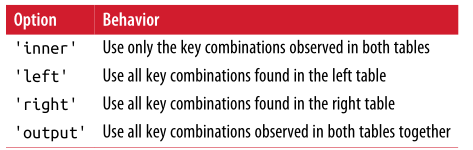

Many-to-many merges have well-defined:

In [42]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
....: 'data1': range(6)})

In [43]:
df2 = pd.DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],
....: 'data2': range(5)})

In [44]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [45]:
df2

,key,data2
0,a,0
1,b,1
2,a,2
3,b,3
4,d,4


In [46]:
pd.merge(df1, df2, on='key', how='left')

,key,data1,data2
0,b,0,1.0
1,b,0,3.0
2,b,1,1.0
3,b,1,3.0
4,a,2,0.0
5,a,2,2.0
6,c,3,NaN
7,a,4,0.0
8,a,4,2.0
9,b,5,1.0


Many-to-many joins form a Cartesian product of the rows, since there were three 'b' row in the left DataFrame nad two in the right one, there are six 'b' row in the result.

To merge with multiple keys, pass a list of the column names:

In [47]:
left = pd.DataFrame({'key1': ['foo', 'foo', 'bar'],
....: 'key2': ['one', 'two', 'one'],
....: 'lval': [1, 2, 3]})

In [48]:
right = pd.DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
....: 'key2': ['one', 'one', 'one', 'two'],
....: 'rval': [4, 5, 6, 7]})

In [49]:
pd.merge(left, right, on=['key1', 'key2'], how='outer')

,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


*merge*()有一个*suffixes*参数用于给参加同名的列名添加后缀：

In [50]:
pd.merge(left, right, on='key1')

,key1,key2_x,lval,key2_y,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


从上述的例子可以看出，默认情况下，*merge*()会将同名的列名添加_x和_y后缀。我们也可以通过*suffixes*参数指定后缀：

In [51]:
pd.merge(left, right, on='key1', suffixes=['_left', '_right'])

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


The *pandas.merge*() function arguments list below:  
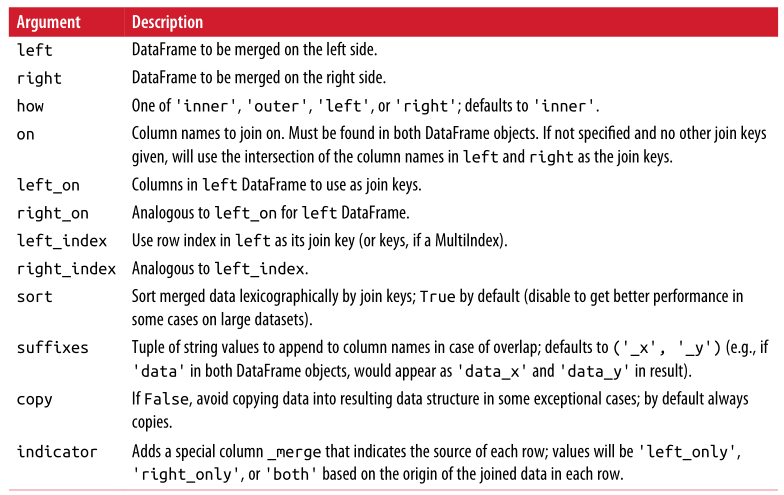

#### Merging on Index

In some cases, the merge key(s) in a DataFrame will be found in its index. In this case, we can pass *left_index*=True or right_index=True (or both) to indicate that the index should be used as the merge key:

In [52]:
left1 = pd.DataFrame({'key':['a', 'b', 'a', 'a', 'b', 'c'],
                     'value':range(6)})

In [54]:
right1 = pd.DataFrame({'group_value':[3.5, 7]}, index=['a', 'b'])

In [55]:
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [56]:
right1


,group_value
a,3.5
b,7.0


In [57]:
pd.merge(left1, right1, left_on='key', right_index=True)

,key,value,group_value
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


Since the defualt merge method is to intersect the join keys, we can instead form a union of them with an outer join:

In [58]:
pd.merge(left1, right1, left_on='key', right_index=True, how='outer')

,key,value,group_value
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


With hierarchically index data, things become more complicated, as joining on index is implicitly a multiple-key merge:

In [59]:
lefth = pd.DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio',
....: 'Nevada', 'Nevada'],
....: 'key2': [2000, 2001, 2002, 2001, 2002],
....: 'data': np.arange(5.)})

In [60]:
righth = pd.DataFrame(np.arange(12).reshape((6, 2)),
....: index=[['Nevada', 'Nevada', 'Ohio', 'Ohio',
....: 'Ohio', 'Ohio'],
....: [2001, 2000, 2000, 2000, 2001, 2002]],
....: columns=['event1', 'event2'])

In [61]:
lefth

,key1,key2,data
0,Ohio,2000,0.0
1,Ohio,2001,1.0
2,Ohio,2002,2.0
3,Nevada,2001,3.0
4,Nevada,2002,4.0


In [62]:
righth

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

In this case, we have to indicate multiple columns to merger on as a list:

In [63]:
pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True)

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4,5
0,Ohio,2000,0.0,6,7
1,Ohio,2001,1.0,8,9
2,Ohio,2002,2.0,10,11
3,Nevada,2001,3.0,0,1


In [65]:
pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True, how='outer')

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4.0,5.0
0,Ohio,2000,0.0,6.0,7.0
1,Ohio,2001,1.0,8.0,9.0
2,Ohio,2002,2.0,10.0,11.0
3,Nevada,2001,3.0,0.0,1.0
4,Nevada,2002,4.0,NaN,NaN
4,Nevada,2000,NaN,2.0,3.0


Using the indexes of both sides of the merge is also possible:

In [66]:
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]],
....: index=['a', 'c', 'e'],
....: columns=['Ohio', 'Nevada'])

In [67]:
right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
....: index=['b', 'c', 'd', 'e'],
....: columns=['Missouri', 'Alabama'])

In [68]:
left2

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


In [69]:
right2

,Missouri,Alabama
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


DataFrame has a convenient *join* method for merging by index. It can be used to combine together many DataFrame objects in the same or silimar indexes but non-overlapping columns. In the prior example, we could have written:

In [70]:
left2.join(right2, how='outer')

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


The equivalent operation is:

In [72]:
pd.merge(left2, right2, left_index=True, right_index=True, how='outer')

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In part for legacy reasons (i.e., much earlier versons of pandas), DataFrame's join method performs the join left, preserving the left frame's row index. It also supports joining the index of the passed DataFrame on one of the columns of the calling DataFrame:

In [73]:
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [74]:
right1

,group_value
a,3.5
b,7.0


在left1的'key'列上合并right1的行索引：

In [75]:
left1.join(right1, on='key')

,key,value,group_value
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0
5,c,5,NaN


Lastly, for simple index-on-index merge, we can pass a list of DataFrames to join as an alternative to using the more general *concat*() function in next section:

In [76]:
another = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
....: index=['a', 'c', 'e', 'f'],
....: columns=['New York', 'Oregon'])

In [77]:
another

,New York,Oregon
a,7.0,8.0
c,9.0,10.0
e,11.0,12.0
f,16.0,17.0
